In [3]:
# This is a quick-start file for the assignment. Feel free to erase cells you don't need.

In [4]:
# Your environment is probably missing some packages. We will check and, if necessary, install.
# https://pypi.org/project/yfinance
import pip
from pip._internal.utils.misc import get_installed_distributions
pkgs = ''.join(str(get_installed_distributions(local_only=True)))
if "yfinance" not in pkgs:
    !pip install yfinance
if "lxml" not in pkgs:
    !pip install lxml 

In [5]:
# Now we can import yfinance
import yfinance as yf
import pandas as pd
from pathlib import Path

In [29]:
# Let's define some useful constants
START = "2019-01-01"
END   = "2020-01-08"

company_name = 'AAPL'

TICKERS = [company_name]

DATAFILE_NAME = "data.pickle2" + company_name

In [26]:
# It's practical to download data from Yahoo!Finance just once and keep a local copy
if Path(DATAFILE_NAME).is_file(): # check if we got the datafile already
    data1 = pd.read_pickle(DATAFILE_NAME) # read it
else:
    data1 = yf.download(tickers=TICKERS, start=START, end=END, auto_adjust=True)
    data1.to_pickle(DATAFILE_NAME) # save localy

In [32]:
data1.head()

,Open,High,Low,Close,Volume
Date,,,,,
2019-12-31,71.278314,72.200239,71.177516,72.192863,100805600
2020-01-02,72.829608,73.901504,72.571473,73.840042,135480400
2020-01-03,73.053317,73.896570,72.893519,73.122154,146322800
2020-01-06,72.227286,73.744155,71.971603,73.704819,118387200
2020-01-07,73.714658,73.975255,73.134463,73.358185,108872000


In [33]:
data1

,Open,High,Low,Close,Volume
Date,,,,,
2019-12-31,71.278314,72.200239,71.177516,72.192863,100805600
2020-01-02,72.829608,73.901504,72.571473,73.840042,135480400
2020-01-03,73.053317,73.896570,72.893519,73.122154,146322800
2020-01-06,72.227286,73.744155,71.971603,73.704819,118387200
2020-01-07,73.714658,73.975255,73.134463,73.358185,108872000


In [30]:
# It's practical to download data from Yahoo!Finance just once and keep a local copy
if Path(DATAFILE_NAME).is_file(): # check if we got the datafile already
    data2 = pd.read_pickle(DATAFILE_NAME) # read it
else:
    data2 = yf.download(tickers=TICKERS, start=START, end=END, auto_adjust=True)
    data2.to_pickle(DATAFILE_NAME) # save localy

In [123]:
data2.reset_index(inplace=True)
data2

,index,Date,Open,High,Low,Close,Volume
0,0,2018-12-31,38.397145,38.598178,37.900619,38.205803,140014000
1,1,2019-01-02,37.515513,38.474656,37.355655,38.249401,148158800
2,2,2019-01-03,34.873026,35.294468,34.393456,34.439476,365248800
3,3,2019-01-04,35.006239,35.979914,34.829429,35.909672,234428400
4,4,2019-01-07,36.016247,36.047735,35.338065,35.829746,219111200
...,...,...,...,...,...,...,...
252,252,2019-12-31,71.278314,72.200239,71.177516,72.192863,100805600
253,253,2020-01-02,72.829608,73.901504,72.571473,73.840042,135480400
254,254,2020-01-03,73.053317,73.896570,72.893519,73.122154,146322800
255,255,2020-01-06,72.227286,73.744155,71.971603,73.704819,118387200


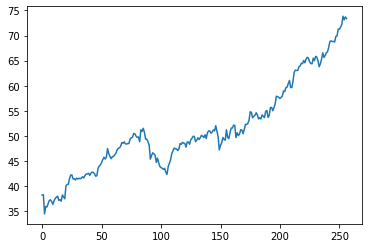

In [103]:
data2["Close"].plot()

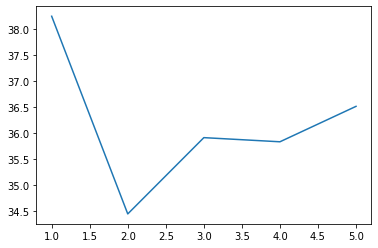

In [122]:
data2.loc[1:5,"Close"].plot()

In [134]:
#Highest drop in one day
highest_drop = 0
index = 0
for i in range(len(data2)-1):
    if i < len(data2)-1:
        change = data2.iloc[i+1]["Close"] - data2.iloc[i]["Close"]
        if highest_drop > change:
            highest_drop = change
            index = i
drop_pros = (highest_drop / data2.iloc[i]["Close"])*100
new_date = str(data2.iloc[i+1]["Date"].year) + "." + str(data2.iloc[i+1]["Date"].month) + "." + str(data2.iloc[i+1]["Date"].day)
print("The highest drop in one day was: " + str(highest_drop) + "\n" + "Drop-%: " + str(drop_pros) + "\n" + "Date: " + new_date)

The highest drop in one day was: -3.809925079345703
Drop-%: -5.16916688111075
Date: 2020.1.7
